# **Notebook 16.3: Contraction mappings**

This notebook investigates a 1D normalizing flows example similar to that illustrated in figure 16.9 in the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Define a function that is a contraction mapping
def f(z):
    return 0.3 + 0.5 *z + 0.02 * np.sin(z*15)

In [28]:
def draw_function(f, fixed_point=None):
  z = np.arange(0,1,0.01)
  z_prime = f(z)

  # Draw this function
  fig, ax = plt.subplots()
  ax.plot(z, z_prime,'c-')
  ax.plot([0,1],[0,1],'k--')
  if fixed_point!=None:
    ax.plot(fixed_point, fixed_point, 'ro')
  ax.set_xlim(0,1)
  ax.set_ylim(0,1)
  ax.set_xlabel('Input, $z$')
  ax.set_ylabel('Output, f$[z]$')
  plt.show()

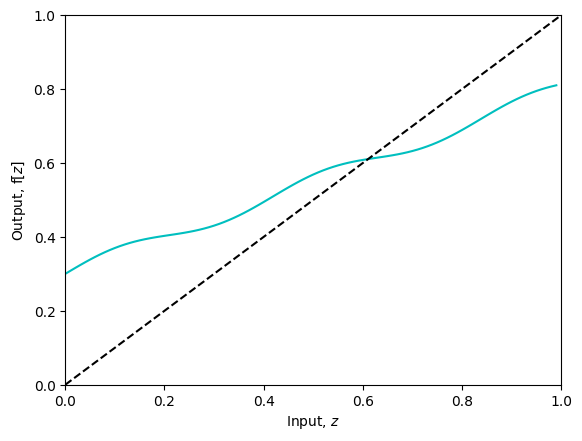

In [29]:
draw_function(f)

Now let's find where $\mbox{f}[z]=z$ using fixed point iteration

In [65]:
# Takes a function f and a starting point z
def fixed_point_iteration(f, z0):
  # TODO -- write this function
  # Print out the iterations as you go, so you can see the progress
  # Set the maximum number of iterations to 20
  # Replace this line
  z_out = 0.5;

  # BEGIN_ANSWER
  z_out = z0
  c_iter = 0
  while (np.abs(z_out-f(z_out))>0.001 and c_iter < 20):
    z_out = f(z_out)
    c_iter+=1
    print(z_out)
  # END_ANSWER

  return z_out

Now let's test that and plot the solution

0.18282240016119733
0.19808123120670543
0.18454228385062757
0.19657138208948802
0.1858936821178017
0.1953815954815069
0.18695723185974994
0.1944432274070504
0.18779510374950936
0.19370278464972104
0.18845562633742316
0.19311835650277373
0.1889765677487347
0.19265699967139396
0.18938754467352667
0.19229276891239214
0.1897118334285571
0.1920052068989102
0.18996775391111273
0.19177817269496533


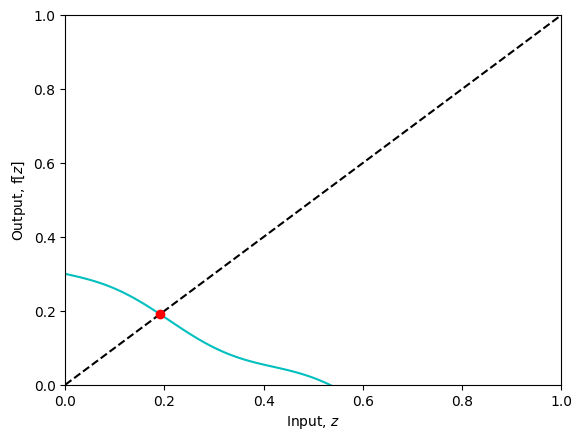

In [61]:
# Now let's test that
z = fixed_point_iteration(f, 0.2)
draw_function(f, z)

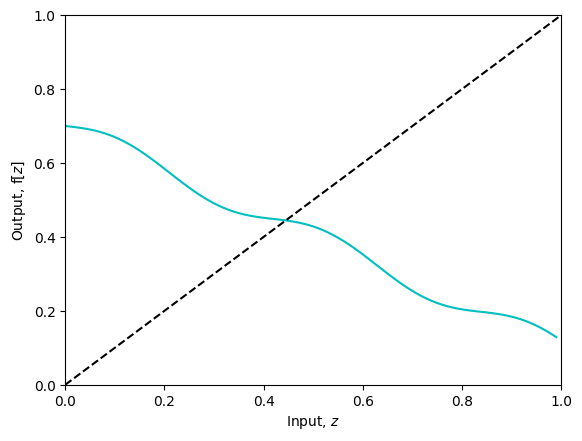

In [62]:
# Let's define another function
def f2(z):
    return 0.7 + -0.6 *z + 0.03 * np.sin(z*15)
draw_function(f2)

0.18411353279654855
0.6006564203167869
0.3516999694124375
0.4636120565164512
0.44048574625343684
0.4452622505917558


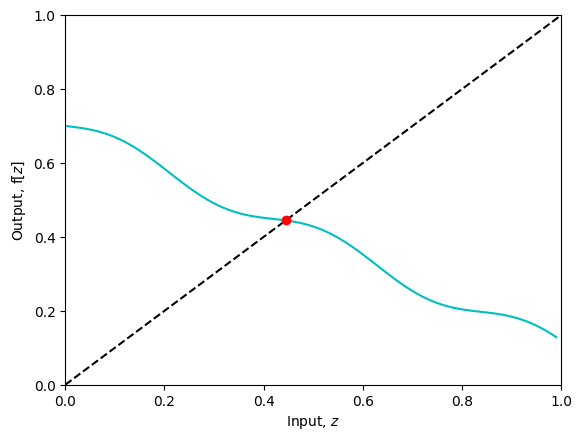

In [48]:
# Now let's test that
# TODO Before running this code, predict what you think will happen
z = fixed_point_iteration(f2, 0.9)
draw_function(f2, z)

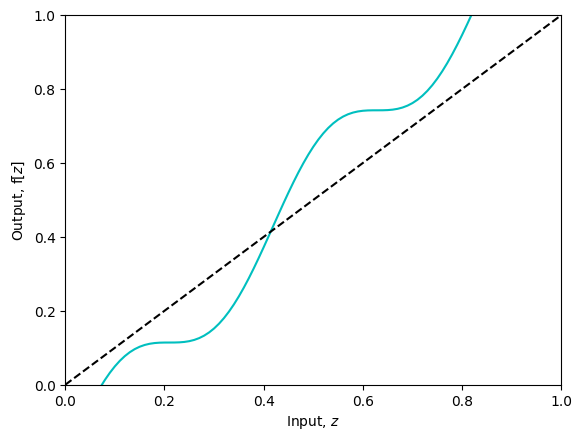

In [63]:
# Let's define another function
# Define a function that is a contraction mapping
def f3(z):
    return -0.2 + 1.5 *z + 0.1 * np.sin(z*15)
draw_function(f3)

0.7620304240028328
0.852353662816486
1.10024944549122
1.3789333182004109
1.9649445616934311
2.6542189306784874
3.8669252142339263
5.699720559978504
8.287262486792992
12.13321806346622
17.97858000000168
26.720079496943235
39.78318188656339
59.45934708287731
88.95736399862616
133.30891572678985
199.86336857832762
299.67155903822714
449.35924035906663
673.7393758892293


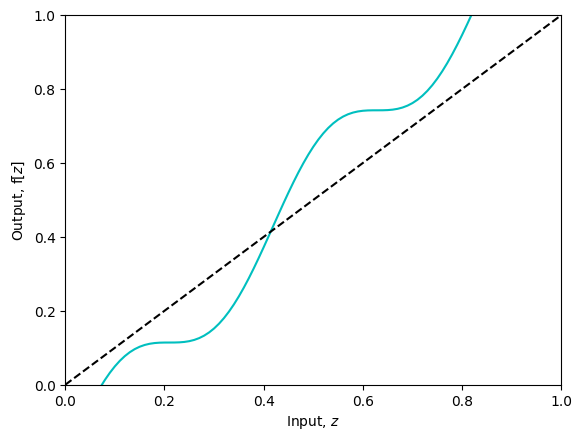

In [64]:
# Now let's test that
# TODO Before running this code, predict what you think will happen
z = fixed_point_iteration(f3, 0.7)
draw_function(f3, z)

Finally, let's invert a problem of the form $y = z+ f[z]$  for a given value of $y$. What is the $z$ that maps to it?

In [91]:
def f4(z):
   return -0.3 + 0.5 *z + 0.02 * np.sin(z*15)

In [92]:
def fixed_point_iteration_z_plus_f(f, y, z0):
  # TODO -- write this function
  # Replace this line
  z_out = 1

  # BEGIN_ANSWER
  z_out = z0
  c_iter = 0
  while c_iter < 10:
    z_out = y - f(z_out)
    c_iter+=1
    print(z_out)
  # END_ANSWER

  return z_out

In [101]:
def draw_function2(f, y, fixed_point=None):
  z = np.arange(0,1,0.01)
  z_prime = z+f(z)

  # Draw this function
  fig, ax = plt.subplots()
  ax.plot(z, z_prime,'c-')
  ax.plot(z, y-f(z),'r-')
  ax.plot([0,1],[0,1],'k--')
  if fixed_point!=None:
    ax.plot(fixed_point, y, 'ro')
  ax.set_xlim(0,1)
  ax.set_ylim(0,1)
  ax.set_xlabel('Input, $z$')
  ax.set_ylabel('Output, z+f$[z]$')
  plt.show()

0.9971775998388027
0.5877740460347665
0.7946856908719898
0.7146984607310328
0.7618987446494475
0.7372056300095641
0.751358122513234
0.7435705417942999
0.7479656588581642
0.7455179022048084


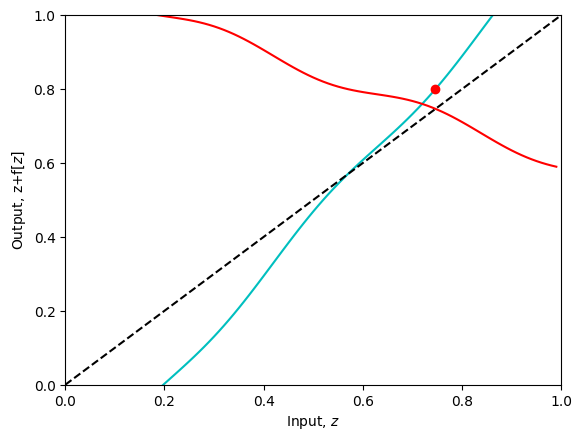

In [103]:
# Test this out and draw
y = 0.8
z = fixed_point_iteration_z_plus_f(f4,y,0.2)
draw_function2(f4,y,z)
# If you have done this correctly, the red dot should be
# where the cyan curve has a y value of 0.8